In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [7]:
data = pd.read_csv('metadata.csv')

data['country'] = data['country'].fillna('USA')
data['language'] = data['language'].fillna('English')
data['content_rating'] = data['content_rating'].fillna('R')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
variables = ['language','country','content_rating']
for i in variables:
    data[i] = le.fit_transform(data[i])

Genere_avail = []
for i in data['genres']:
    full = i.split('|')
    for j in full:
        if j not in Genere_avail:
            Genere_avail.append(j)
            
data['first_genre'] = data['genres'].apply(lambda x:x.split('|')[0])          
le = LabelEncoder()
data['first_genre'] = le.fit_transform(data['first_genre'])
            
for i in Genere_avail:
    data[i] = data['genres'].apply(lambda x:1 if i in x else 0)

data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace=True)
data['duration'].fillna(data['duration'].mean(), inplace=True)
data['facenumber_in_poster'].fillna(data['facenumber_in_poster'].mean(), inplace=True)

data.director_facebook_likes.fillna(data.cast_total_facebook_likes.apply(lambda x:round(x/6)),inplace = True)
data.actor_1_facebook_likes.fillna(data.cast_total_facebook_likes.apply(lambda x:round(2*x/6)),inplace = True)
data.actor_2_facebook_likes.fillna(data.cast_total_facebook_likes.apply(lambda x:round(2*x/6)),inplace = True)
data.actor_3_facebook_likes.fillna(data.cast_total_facebook_likes.apply(lambda x:round(2*x/6)),inplace = True)


data.drop(['genres'],axis=1, inplace=True)

data['duration'] = round(data['duration']/60,2)

data['budget'] = data['budget']/10000000

median=data[['gross','budget']].median()
data=data.fillna(median)
mode=data[['aspect_ratio']].mode().iloc[0]
data=data.fillna(mode)

In [8]:
data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,cast_total_facebook_likes,facenumber_in_poster,language,country,...,Horror,War,Biography,Music,Documentary,Game-Show,Reality-TV,News,Short,Film-Noir
0,723.0,2.97,0.0,855.0,1000.0,760505847.0,4834,0.0,11,62,...,0,0,0,0,0,0,0,0,0,0
1,302.0,2.82,563.0,1000.0,40000.0,309404152.0,48350,0.0,11,62,...,0,0,0,0,0,0,0,0,0,0
2,602.0,2.47,0.0,161.0,11000.0,200074175.0,11700,1.0,11,61,...,0,0,0,0,0,0,0,0,0,0
3,813.0,2.73,22000.0,23000.0,27000.0,448130642.0,106759,0.0,11,62,...,0,0,0,0,0,0,0,0,0,0
4,462.0,2.20,475.0,530.0,640.0,73058679.0,1873,1.0,11,62,...,0,0,0,0,0,0,0,0,0,0


In [121]:
model.fit(data[predictor_var],data[outcome_var])  #finally fitting on whole data

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.03, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [147]:
predictor_var = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes','content_rating',
       'budget', 'actor_2_facebook_likes', 'gross', 'first_genre',
       'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller', 'Romance', 'Animation', 'Comedy',
       'Family', 'Musical', 'Mystery', 'Drama', 'History', 'Sport',
       'Crime', 'Horror', 'Biography', 'Music', 'Documentary']
outcome_var = 'imdb_score'
X_train, X_test, y_train, y_test = train_test_split(data[predictor_var],data[outcome_var],test_size=0.1, random_state=42)

84.55


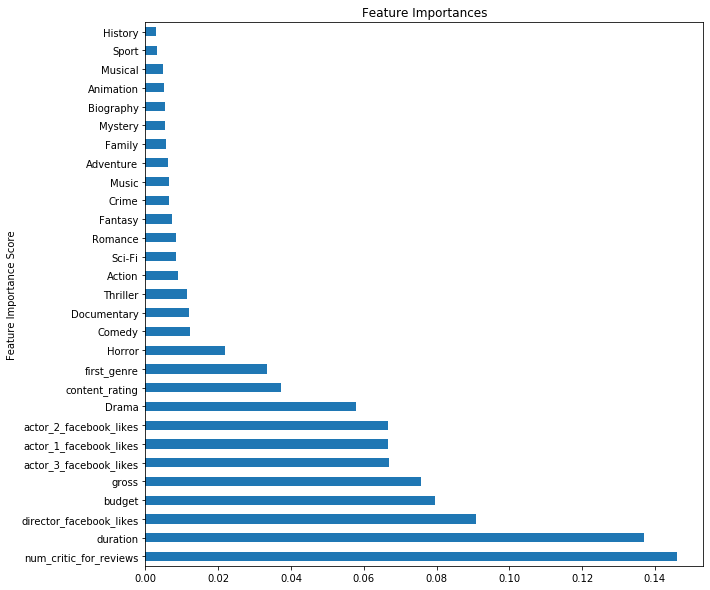

In [148]:
model = ensemble.RandomForestRegressor(max_features=6, min_samples_split=3, n_estimators=300, min_samples_leaf=1)
model.fit(X_train,y_train)

pred=model.predict(X_test)

result = 0
for p,r in zip(pred,y_test.values):
    if (p-r <= 1.0 and p-r > 0) or (r-p <= 1.0 and r-p > 0):
        result += 1

accuracy = round(result/len(pred),4)*100
print(accuracy)

feat_imp = pd.Series(model.feature_importances_, predictor_var).sort_values(ascending=False)
feat_imp.plot(kind='barh', title='Feature Importances',figsize=(10,10))
plt.ylabel('Feature Importance Score')
plt.show()

In [203]:
import dill as pickle
model.fit(data[predictor_var],data[outcome_var])
filename = 'model2.pk'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [2]:
data = pd.read_csv('metadata.csv')

data['country'] = data['country'].fillna('USA')
data['language'] = data['language'].fillna('English')
data['content_rating'] = data['content_rating'].fillna('R')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
variables = ['language','country','content_rating']
for i in variables:
    data[i] = le.fit_transform(data[i])

In [7]:
dict((j,i) for i,j in list(enumerate(le.classes_)))

{'Approved': 0,
 'G': 1,
 'GP': 2,
 'M': 3,
 'NC-17': 4,
 'Not Rated': 5,
 'PG': 6,
 'PG-13': 7,
 'Passed': 8,
 'R': 9,
 'TV-14': 10,
 'TV-G': 11,
 'TV-MA': 12,
 'TV-PG': 13,
 'TV-Y': 14,
 'TV-Y7': 15,
 'Unrated': 16,
 'X': 17}